# Correlate PCA Models
This workflow makes pairwise comparisons between all PCA models to determine trends in similarity across models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util_functions import list_subjects, load_file, pickle_file, starting_run, finished_run

### Notebook Parameters

In [2]:
model_df = load_file('data_meta_pickled/pca_models_pickled_df.pickle')
geography_list=load_file('data_synthesized_pickled/geo_plotting_data.pickle')
# geo_corr_df = pd.DataFrame(columns=['subject_1', 'stimulus_1', 'component_1', 'subject_2', 'stimulus_2', 'component_1', 'geo_corr'])

### Correlate Geographies
This workflow determines "geographical" correlations for each pairwise component comparison by comparing the differential in the loadings of each component on each standardized geographical bin created in Workflow 04.

In [3]:
df = pd.DataFrame(geography_list)

In [4]:
df = df.loc[:,['subject', 'stimulus', 'bin_scores', 'save_path']]
comp_list = []
bin_list = []
comp_value = 0
def mapping_func(values):
    global comp_value
    comp_value +=1
    return [
        row.subject,
        row.stimulus,
        comp_value - 1,
        pd.Series(values, index=bin_list)
    ]

for row in df.itertuples():
    bin_list = row.bin_scores.index
    comp_value = 0
    comp_list.extend(map(
        mapping_func,
        row.bin_scores.values.T
    ))
len(comp_list)

1280

In [5]:
comp_list_1 = np.tile(comp_list, (len(comp_list),1))
comp_list_2 = np.repeat(comp_list, len(comp_list), axis=0)
df_1 = pd.DataFrame(comp_list_1, columns=['subject', 'stimulus', 'component', 'values']).add_suffix('_1')
df_2 = pd.DataFrame(comp_list_2, columns=['subject', 'stimulus', 'component', 'values']).add_suffix('_2')
comp_df = pd.concat([df_1, df_2], axis=1)
comp_df

,subject_1,stimulus_1,component_1,values_1,subject_2,stimulus_2,component_2,values_2
0,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....
1,subject_1,None,1,bin 859.0 -1.686673 860.0 -0.461696 861....,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....
2,subject_1,None,2,bin 859.0 -1.670435 860.0 -0.593528 861....,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....
3,subject_1,None,3,bin 859.0 -1.749318 860.0 0.177862 861....,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....
4,subject_1,None,4,bin 859.0 -1.278705 860.0 -0.237793 861....,subject_1,None,0,bin 859.0 -1.225337 860.0 0.068027 861....
...,...,...,...,...,...,...,...,...
1638395,subject_7,3,5,bin 860.0 -0.139110 861.0 0.305457 862....,subject_7,3,9,bin 860.0 0.672469 861.0 0.586781 862....
1638396,subject_7,3,6,bin 860.0 0.061741 861.0 0.339271 862....,subject_7,3,9,bin 860.0 0.672469 861.0 0.586781 862....
1638397,subject_7,3,7,bin 860.0 0.184316 861.0 0.431885 862....,subject_7,3,9,bin 860.0 0.672469 861.0 0.586781 862....
1638398,subject_7,3,8,bin 860.0 0.405920 861.0 0.577852 862....,subject_7,3,9,bin 860.0 0.672469 861.0 0.586781 862....


In [6]:
def correlate_component_geographies(comps):
    comp_1 = comps[0]
    comp_2 = comps[1]
    return comp_1.combine(comp_2,np.minimum).dropna().sum()

In [7]:
type(comp_df.at[0, 'values_1'])

pandas.core.series.Series

In [8]:
print(starting_run())
comp_df['geo_corr'] = comp_df.loc[:, ['values_1', 'values_2']].apply(correlate_component_geographies, axis=1)
print(starting_run())

Starting  19:40:20.444837
None
Starting  08:17:16.996846
None


In [9]:
stupid = comp_df[(comp_df.subject_1=='subject_15')  &
        (comp_df.stimulus_1=='9') &
        (comp_df.component_1==3) &
        (comp_df.subject_2=='subject_6') & 
        (comp_df.stimulus_2=='3') &
        (comp_df.component_2==9)
       ][['values_1', 'values_2']]
comp_df.at[1599423, 'values_1'].max()

2.4627249240875244

In [10]:
comp_df.loc[0:100, ['values_1', 'values_2']].apply(correlate_component_geographies, axis=1)

0        0.000003
1     -180.491971
2     -264.303435
3     -263.882783
4     -284.963378
          ...    
96    -254.319426
97    -181.557010
98    -281.132191
99    -238.070418
100   -175.974616
Length: 101, dtype: float64

### Score Datasets
This portion of the workflow has generated models score the likelihoods of encountering each fish-stimulus dataset given the trained model. This should then serve as raw data to show the extent to which components explain variance across fish and stimuli

In [11]:
del comp_df['values_1']
del comp_df['values_2']
comp_df

,subject_1,stimulus_1,component_1,subject_2,stimulus_2,component_2,geo_corr
0,subject_1,None,0,subject_1,None,0,0.000003
1,subject_1,None,1,subject_1,None,0,-180.491971
2,subject_1,None,2,subject_1,None,0,-264.303435
3,subject_1,None,3,subject_1,None,0,-263.882783
4,subject_1,None,4,subject_1,None,0,-284.963378
...,...,...,...,...,...,...,...
1638395,subject_7,3,5,subject_7,3,9,-120.857765
1638396,subject_7,3,6,subject_7,3,9,-80.130467
1638397,subject_7,3,7,subject_7,3,9,-73.075102
1638398,subject_7,3,8,subject_7,3,9,-83.330366


In [12]:
component_data_list = []
for row in model_df.itertuples():
    model = load_file(row.model_path)
    file = load_file(row.orig_data_path)
    transformed_file = model.transform(file).T
    for component in range(0,len(transformed_file)):
        component_data_list.append([
            row.subject,
            row.stimulus,
            component,
            transformed_file[component]
        ])

In [13]:
component_data_df = pd.DataFrame(component_data_list, columns=['subject', 'stimulus', 'component', 'values'])
component_data_df.set_index(['subject', 'stimulus', 'component'], inplace=True)
component_data_df

values
subject   stimulus component                                                   
subject_1 NaN      0          [-48.170998, -48.28949, -52.77551, -56.916847,...
                   1          [11.377607, 7.792913, 4.14573, 2.4885788, 1.86...
                   2          [-20.204668, -14.839192, -13.618059, -15.82723...
                   3          [47.245174, 38.242805, 26.41815, 16.093178, 6....
                   4          [11.603609, 5.6201515, 5.8962016, 8.08738, 13....
...                                                                         ...
subject_7 3        5          [48.479015, 58.515423, 57.010845, 57.48697, 58...
                   6          [6.3079686, -9.901193, -23.626091, -29.822756,...
                   7          [-34.051594, -36.19658, -29.069258, -28.137783...
                   8          [-8.824132, -11.463139, -12.318361, -14.089375...
                   9          [-48.61079, -38.202118, -26.142582, -24.21814,...

[1280 rows x 1 columns]

In [14]:
def normalize_comp_lengths(comp_1, comp_2):
    if comp_1.size == comp_2.size:
        return comp_1, comp_2
    elif comp_1.size > comp_2.size:
        return normalize_comp_lengths(comp_2, comp_1)
    while comp_1.size < comp_2.size:
        comp_1 = np.concatenate((comp_1, comp_1), axis=None)
    comp_1 = comp_1[0:comp_2.size]
    return comp_1, comp_2

In [15]:
def correlate_components(row):
    comp1=component_data_df.at[(row['subject_1'], row['stimulus_1'], row['component_1']), 'values']
    comp2=component_data_df.at[(row['subject_2'], row['stimulus_2'], row['component_2']), 'values']
    comp1, comp2 = normalize_comp_lengths(comp1, comp2)
    cov_matrix = np.cov([comp1, comp2])
    return np.average(np.abs([cov_matrix[0][1] + cov_matrix[1][0]]))

In [16]:
starting_run()
comp_df['covariance']=comp_df.apply(correlate_components, axis=1)
finished_run()

Starting  08:18:28.884026
Finished  08:24:55.968815


In [17]:
pickle_file('results/component_correlations_df.pickle', comp_df)

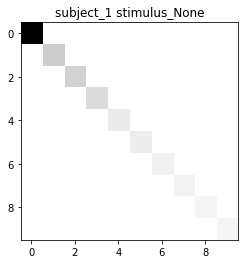

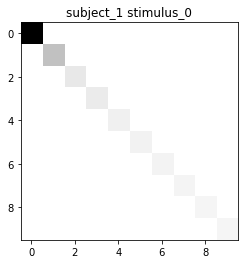

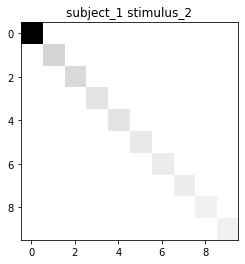

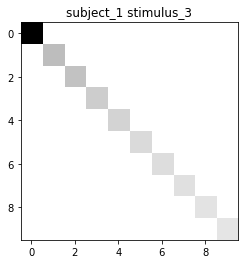

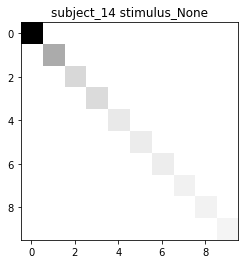

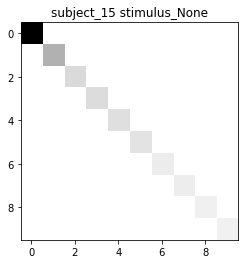

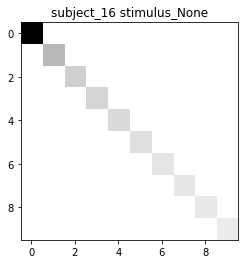

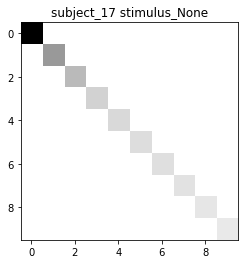

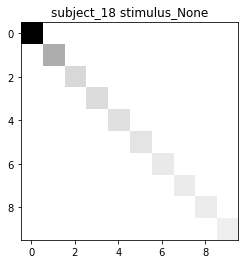

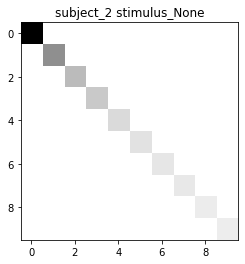

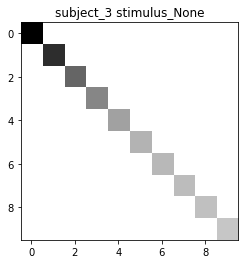

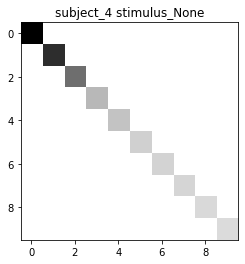

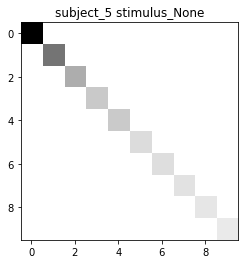

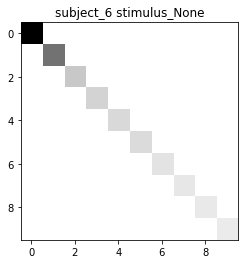

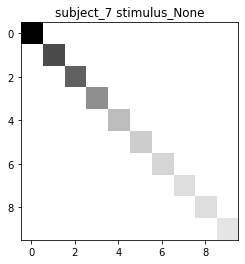

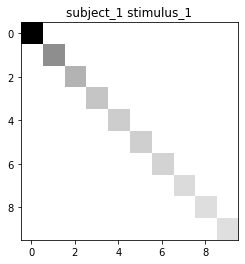

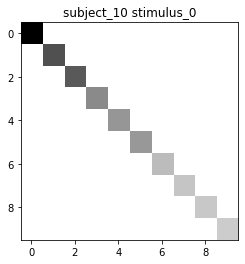

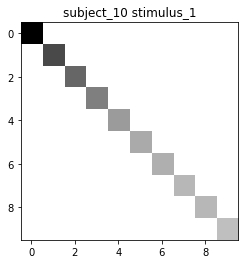

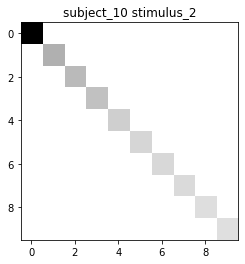

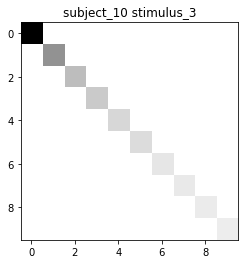

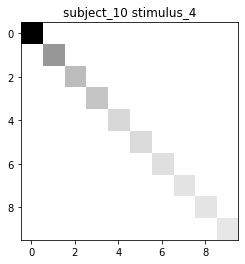

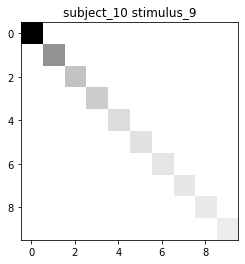

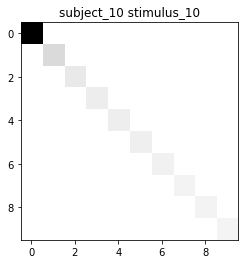

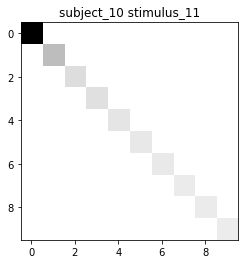

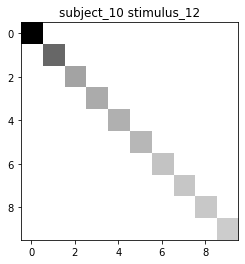

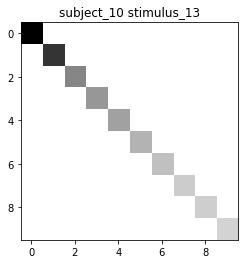

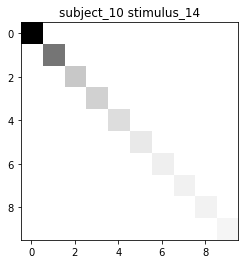

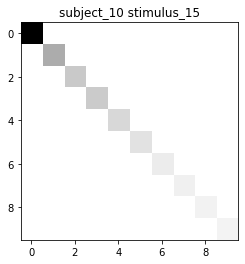

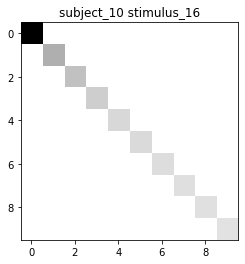

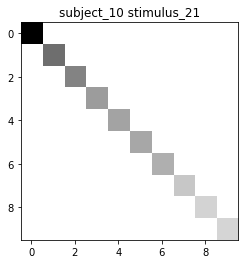

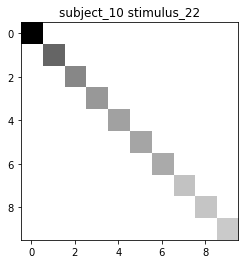

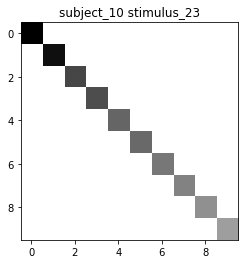

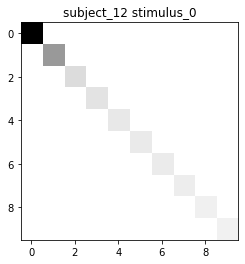

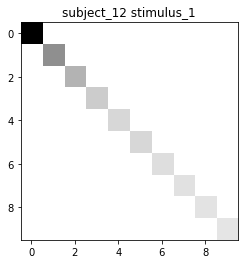

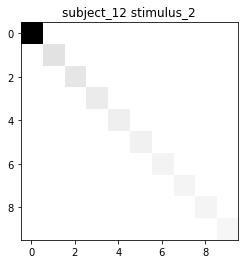

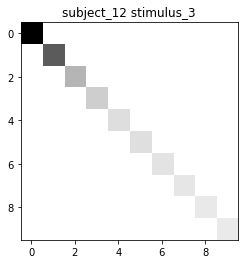

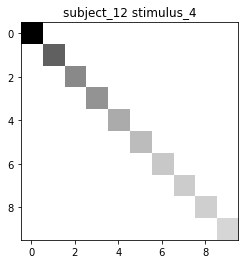

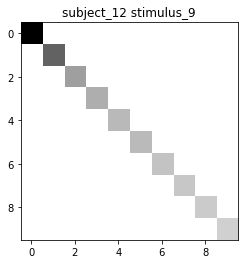

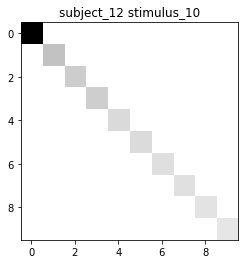

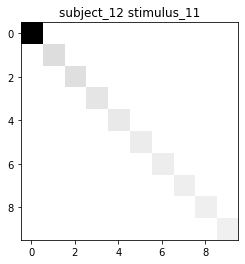

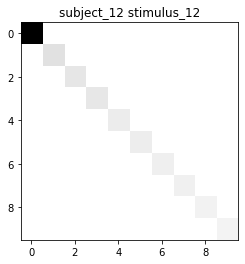

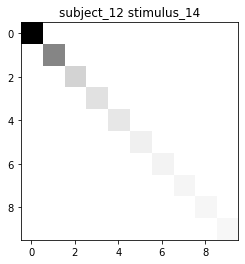

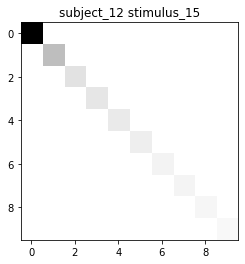

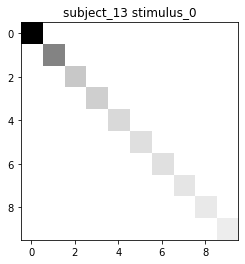

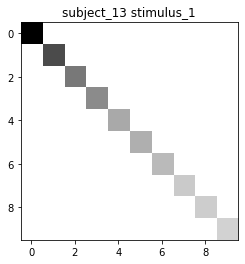

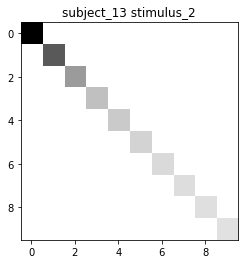

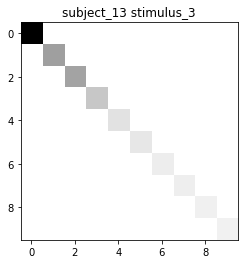

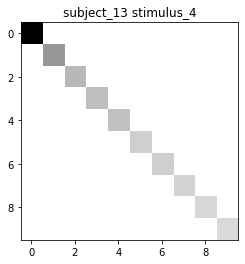

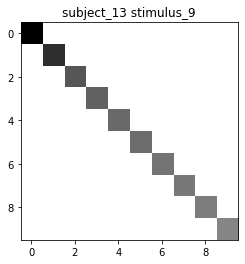

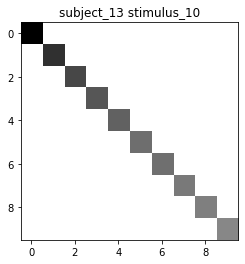

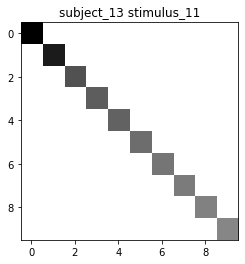

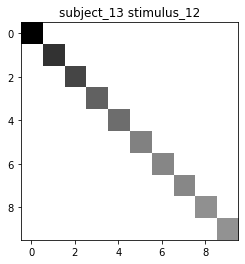

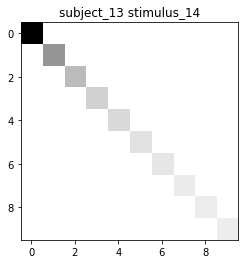

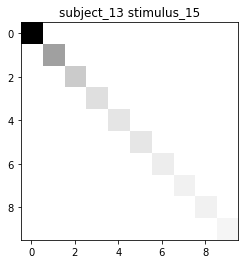

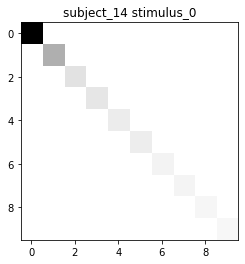

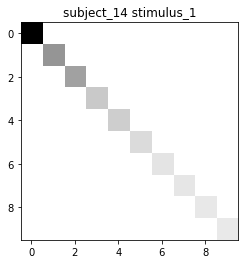

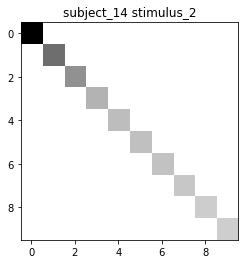

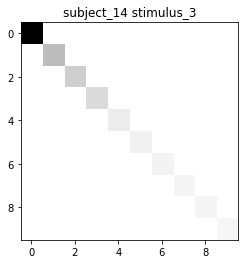

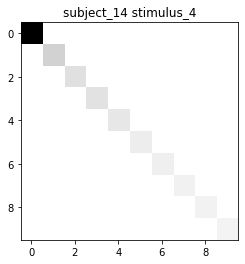

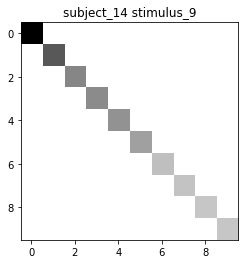

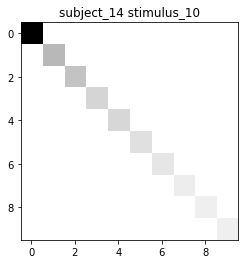

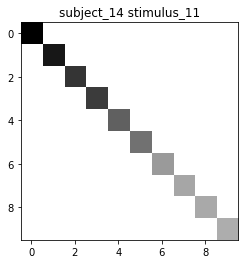

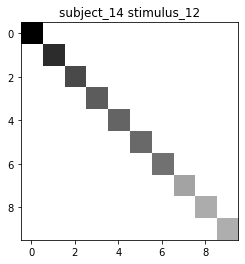

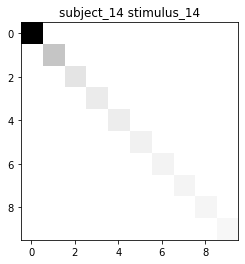

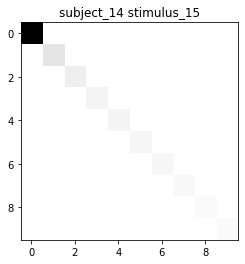

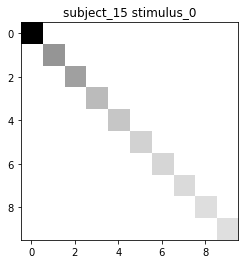

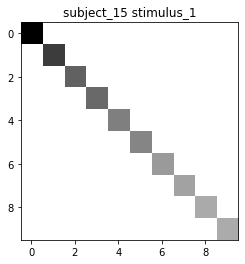

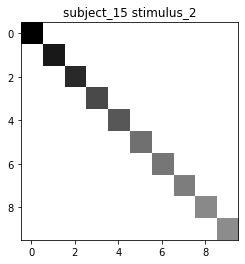

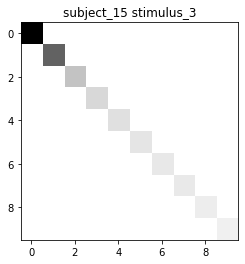

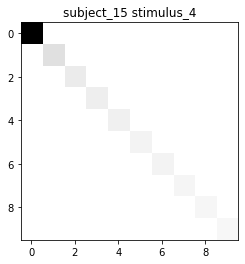

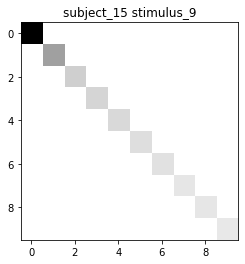

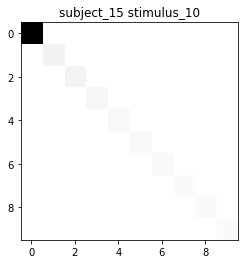

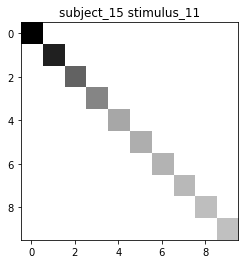

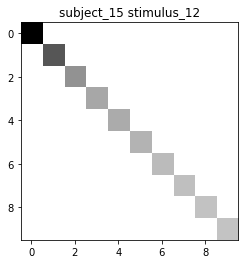

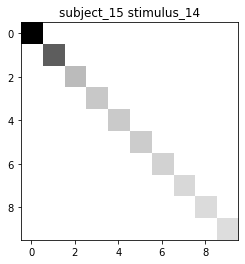

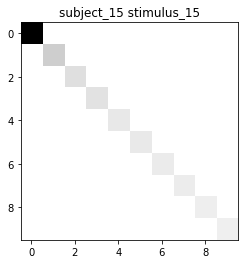

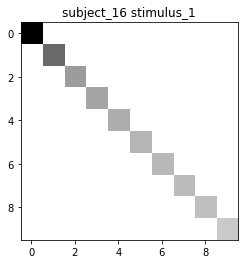

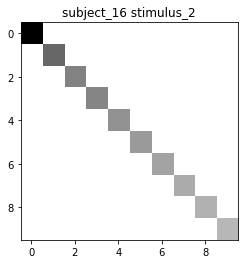

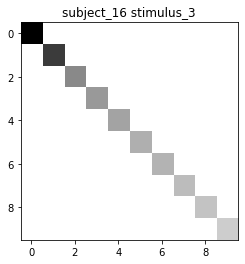

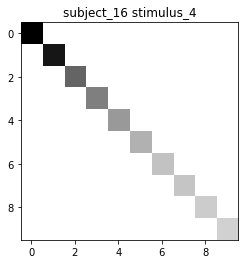

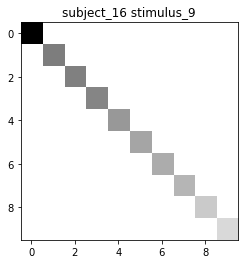

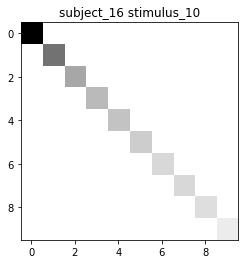

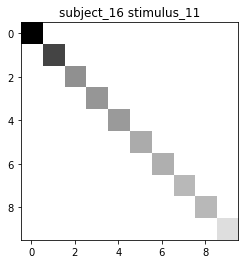

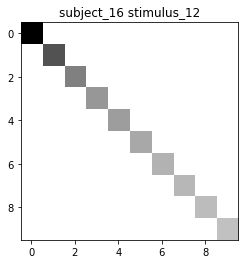

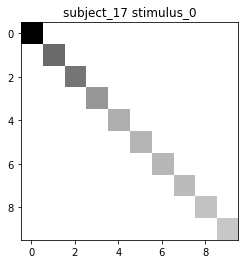

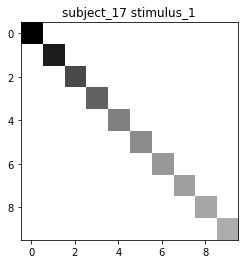

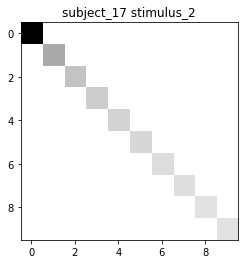

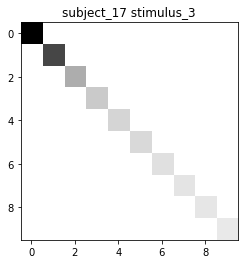

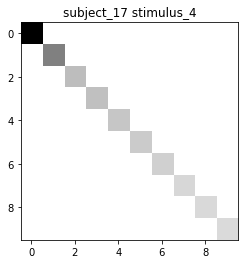

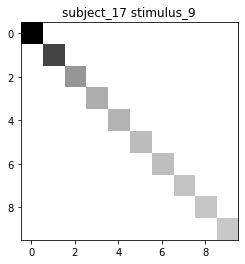

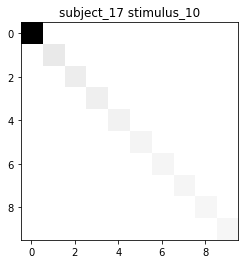

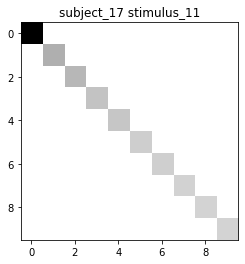

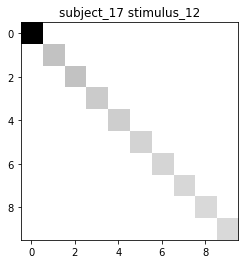

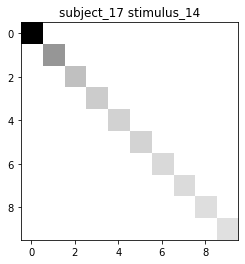

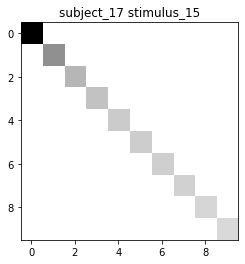

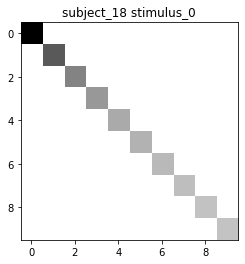

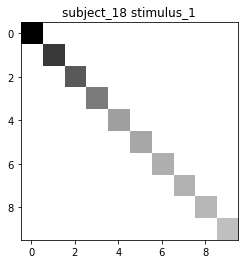

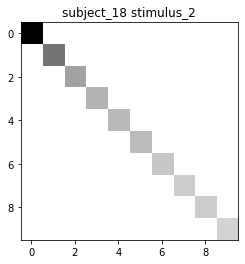

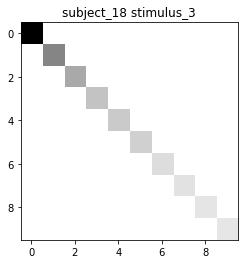

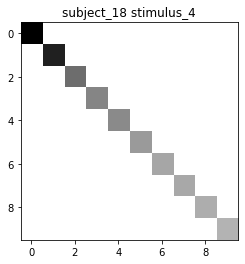

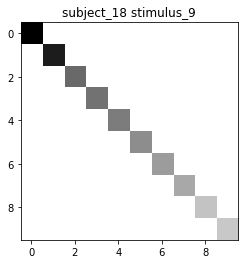

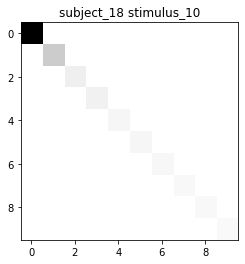

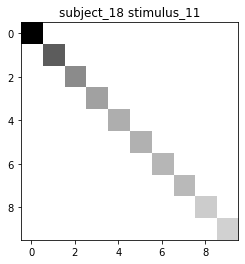

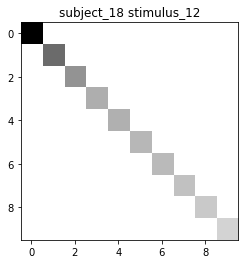

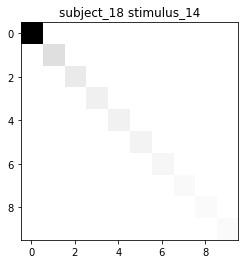

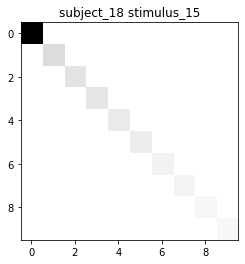

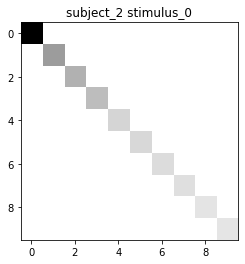

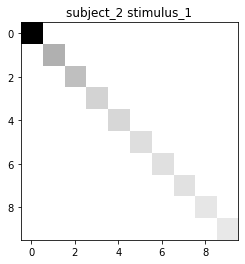

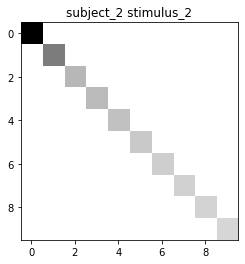

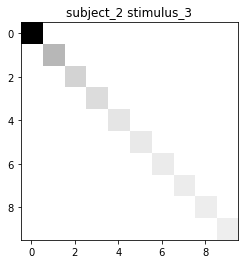

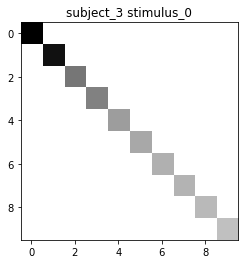

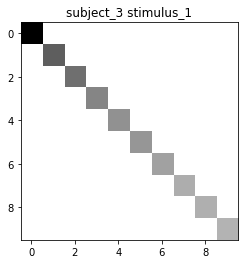

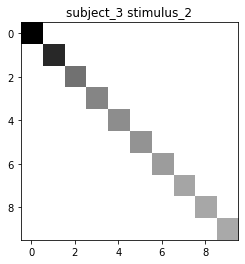

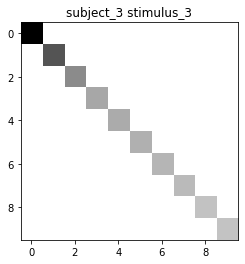

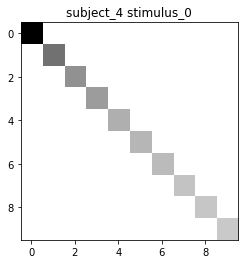

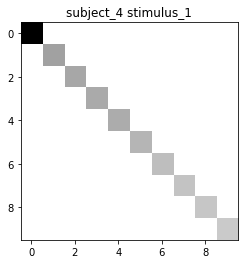

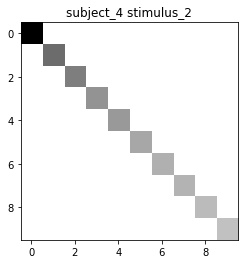

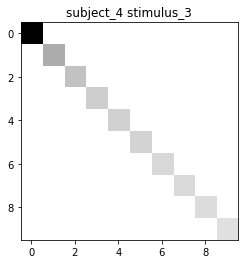

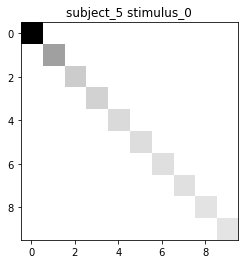

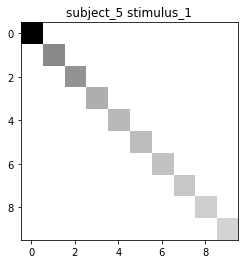

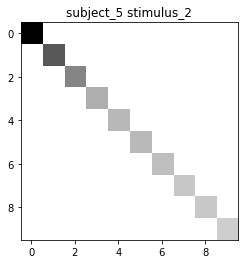

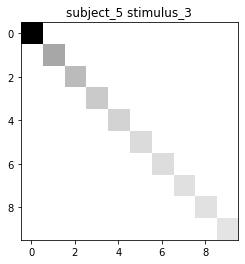

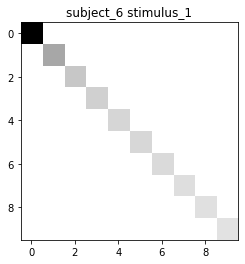

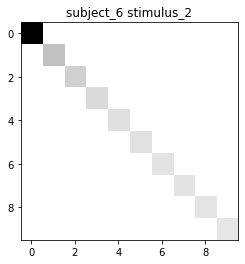

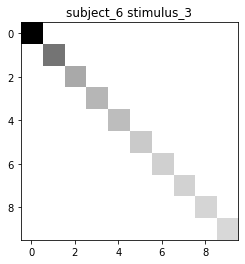

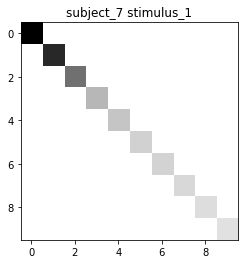

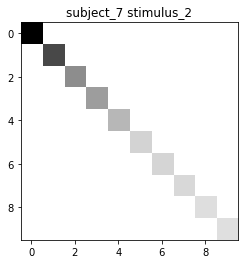

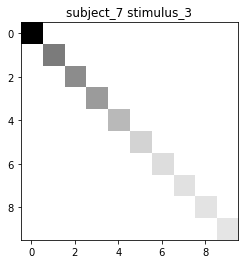

In [18]:
for row in model_df.itertuples():
    model = load_file(row.model_path)
    file = load_file(row.orig_data_path)
    covariance_model = np.cov(model.transform(file).T)
    plt.imshow(covariance_model, cmap='binary')
    plt.title(row.subject + ' stimulus_' + str(row.stimulus))
    plt.show()

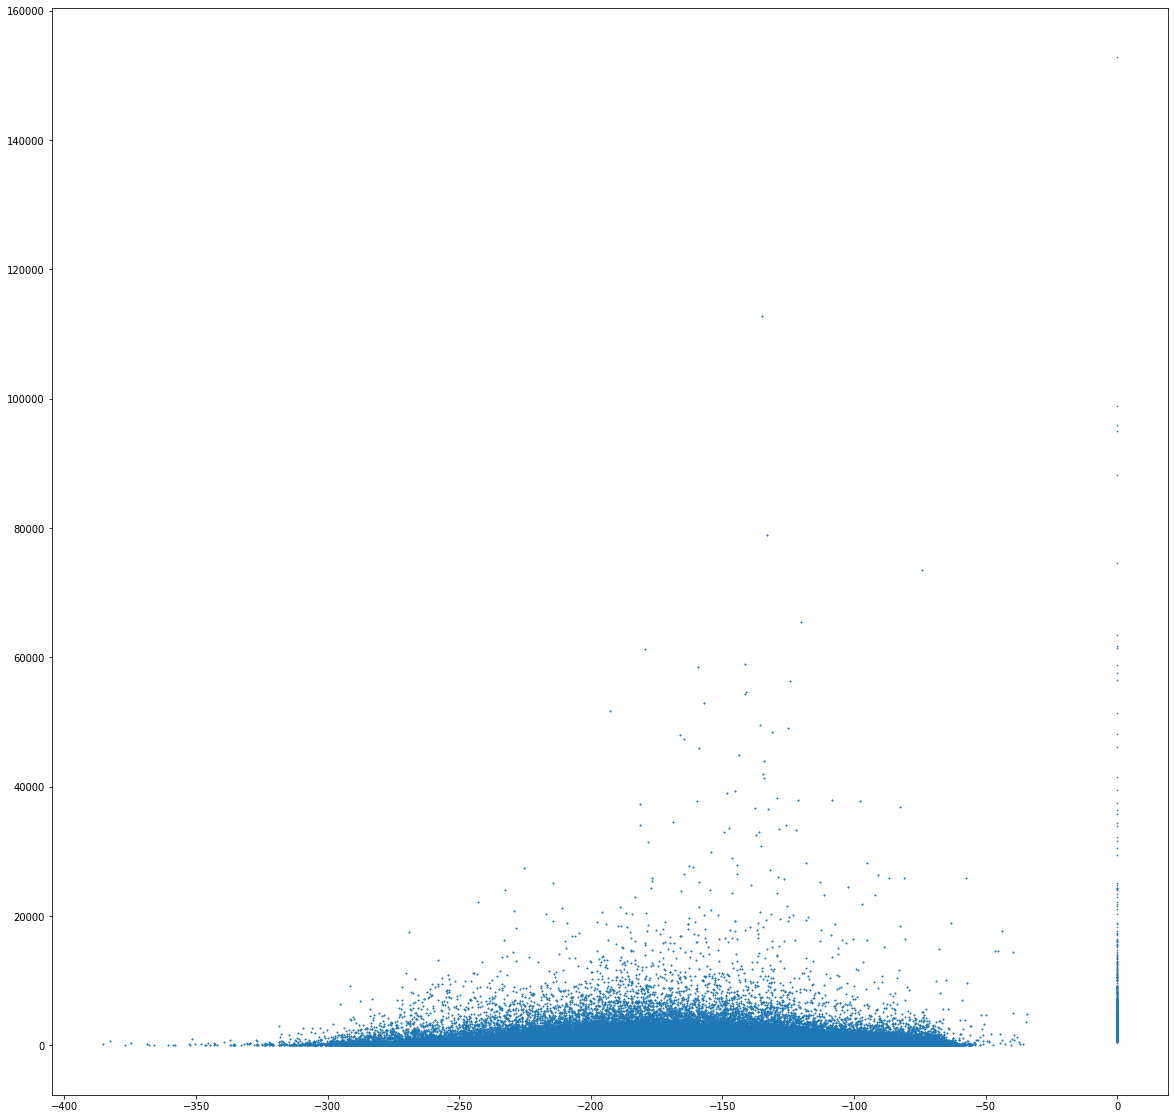

In [19]:
fig = plt.figure(figsize=(20,20))
plt.scatter(comp_df.geo_corr, comp_df.covariance, s=.5)
plt.show()